## Natural Language Processing with RNNs 

<b>Thai Characters and Script:</b> The Thai language uses its own unique script, comprised of 44 consonants, 15 vowel symbols that combine into at least 28 vowel forms, and four tone diacritics. A model aimed at generating Thai text must be capable of understanding and producing these characters accurately.

<b>Word Generation:</b> Unlike many Western languages, Thai does not use spaces between words. This means the model must learn to identify where one word ends and another begins, which is a non-trivial task. The model does this by learning patterns in the sequence of characters that typically signify the start or end of a word.

<b>Contextual Understanding:</b> To generate coherent sentences, the model must have a contextual understanding of the language. This involves not just stringing words together but understanding how they fit in a sentence to convey meaning. This is particularly challenging in Thai due to its complex sentence structures and use of tones, which can change the meaning of a word.

<b>Training on Thai Language Data:</b> For the model to generate Thai text, it must be trained on a large dataset of Thai language text. This training allows the model to learn the patterns, nuances, and grammar of Thai.

<b>Neural Networks and NLP Techniques:</b> The model likely uses neural network architectures, such as Recurrent Neural Networks (RNNs) or Transformers, which are effective for processing sequential data like text. These networks can remember previous inputs (like earlier parts of a sentence) which is crucial for maintaining context and generating grammatically correct and coherent sentences.

<b>Challenges:</b>
Thai, a language with its unique script and complex grammatical structures, presents intriguing challenges for text generation. Its absence of spaces between words and intricate set of rules for sentence formation make it a fascinating case for NLP applications. Natural Language Processing enables computers to analyze, understand, and generate human language. In the context of Thai, NLP must navigate unique challenges such as:

Word Segmentation: Identifying boundaries between words in a script devoid of spaces.

Contextual Understanding: Grasping the nuances of Thai language, including its tonal variations and idiomatic expressions.

##### Credits:
https://github.com/longman694/thai-words/blob/master/thai-words.txt

https://pythainlp.github.io/dev-docs/api/generate.html

### Import functions

In [1]:
# Collapse-show
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import requests

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
assert tf.__version__ >= "2.0"

if not tf.test.is_gpu_available():
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from pythainlp.generate import Unigram

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings('ignore')
#tf.config.list_physical_devices('GPU')


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
No GPU was detected. LSTMs and CNNs can be very slow without a GPU.


## Load and Explore Data

In [2]:
thaiWords_url = "https://raw.githubusercontent.com/longman694/thai-words/master/thai-words.txt"  # shortcut URL
filepath = tf.keras.utils.get_file("thai-words.txt", thaiWords_url)
with open(filepath, encoding='utf-8') as f:
    th_text = f.read()

In [3]:
print(th_text)

เครื่องกำเนิดกระแสไฟฟ้า
ความสัมพันธ์ทางสายเลือด
เจ้าพนักงานยึดทรัพย์สิน
ความสามารถในการเรียนรู้
การต่อสายดักฟังโทรศัพท์
อุณหภูมิใต้จุดเยือกแข็ง
อยู่ต่ำกว่าจุดเยือกแข็ง
การศึกษาลำดับกาลของภาษา
เจ้าหน้าที่บนเครื่องบิน
เปลี่ยนทิศทางกระแสไฟฟ้า
เหมาะสมในสถานการณ์เฉพาะ
กล่าวโดยหลักเกณฑ์ทั่วไป
ที่กระตุ้นความอยากอาหาร
เครื่องหมายแปลงเสียงต่ำ
ท่าการจับแบบกีฬามวยปล้ำ
การอพยพไปอยู่ประเทศอื่น
ตกอยู่ภายใต้การครอบครอง
ที่มีอายุไม่เกินหนึ่งปี
ความเชื่อในการดำรงชีวิต
การทำให้เป็นประชาธิปไตย
มหาวิทยาลัยเพนซิลเวเนีย
แผ่นดินใหญ่ของทวีปยุโรป
กระปรี้กระเปร่าอีกครั้ง
ความเสี่ยงในการติดเชื้อ
การขยายตัวทางอุตสาหกรรม
การสูญเสียสารคาร์บอนเนต
การกระทำที่ผิดปกติวิสัย
เกี่ยวกับการได้ยินเสียง
ซูเปอร์มาร์เก็ตขนาดใหญ่
การรวมกันเป็นเนื้อเดียว
การเคลื่อนที่ด้วยตัวเอง
จังหวะการบีบตัวของหัวใจ
พรรคแรงงานสหราชอาณาจักร
การบวนการผลิตผ่านสายพาน
เนื้อเพลงท่อนที่ร้องซ้ำ
การเดินทางโดยเครื่องบิน
การแข่งขันรอบรองชนะเลิศ
กายวิภาคศาสตร์เฉพาะส่วน
พนักงานรักษาความปลอดภัย
คนหรือสิ่งที่เป็นสุดยอด
โรคปวดประสาทอย่างรุนแรง
ช่วงที่กินดื่มมา

In [4]:
print(th_text[13:24])

กระแสไฟฟ้า



In [5]:
# Assuming th_text is a long string with each word on a new line
words_list = th_text.split('\n')

# Now create a DataFrame with this list 
# df is now a DataFrame with each Thai word as a row in the 'Words' column
df = pd.DataFrame(words_list, columns=['Words'])
df

,Words
0,เครื่องกำเนิดกระแสไฟฟ้า
1,ความสัมพันธ์ทางสายเลือด
2,เจ้าพนักงานยึดทรัพย์สิน
3,ความสามารถในการเรียนรู้
4,การต่อสายดักฟังโทรศัพท์
...,...
71240,ก็
71241,งอ
71242,ณ
71243,ม


## Creating the Training Dataset

In [6]:
"".join(sorted(set(th_text.lower())))

'\n !,-/1234กขคฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤลฦวศษสหฬอฮะัาำิีึืุูเแโใไๅ็่้๊๋์ํ'

In [7]:
# Split text by character-level tokenization and set all characters to lowercase
text_vec_layer = tf.keras.layers.TextVectorization(split="character", standardize="lower")

# Adapt the TextVectorization layer to the data in "newData" to learn the vocabulary
text_vec_layer.adapt([th_text]) 

# Store encoded text data in "newData" using the adapted TextVectorization layer
encoded = text_vec_layer([th_text])[0] 

In [8]:
encoded -= 2  # Drop tokens 0 (pad) and 1 (unknown), which we will not use
n_tokens = text_vec_layer.vocabulary_size() - 2  # Number of distinct characters
dataset_size = len(encoded)  # Total number of characters

In [9]:
n_tokens # Represent  distinct characters

77

In [10]:
dataset_size # Total number of characters

666368

In [11]:
# Function to prepare sequences for training by converting them into a suitable TensorFlow 
# dataset format with batching, shuffling, and target creation. 
def to_dataset(sequence, length, shuffle=False, seed=None, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices(sequence)
    ds = ds.window(length + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda window_ds: window_ds.batch(length + 1))
    if shuffle:
        ds = ds.shuffle(60_000, seed=seed)
    ds = ds.batch(batch_size)
    return ds.map(lambda window: (window[:, :-1], window[:, 1:])).prefetch(1)

In [12]:
# Convert a text input into a dataset of fixed-length sequences using TextVectorization.
list(to_dataset(text_vec_layer(["การที่"])[0], length=4))

[(<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
  array([[ 6,  3,  4, 22],
         [ 3,  4, 22, 21]], dtype=int64)>,
  <tf.Tensor: shape=(2, 4), dtype=int64, numpy=
  array([[ 3,  4, 22, 21],
         [ 4, 22, 21, 14]], dtype=int64)>)]

In [13]:
length = 100 # Set the learning character lenght to 100
tf.random.set_seed(42) # Generate random numbers and ensure reproducibility on CPU
train_set = to_dataset(encoded[:600_000], length=length, shuffle=True, # ~90% of the dataset is used for Training set
                       seed=42)
valid_set = to_dataset(encoded[600_000:633_000], length=length) # ~5% of the dataeet is used for Validation set
test_set = to_dataset(encoded[633_000:], length=length) # ~5% of the dataeet is used for Test set

## Building and Training the char-RNN Model

In [14]:
tf.random.set_seed(42) # Generate random numbers and ensure reproducibility on CPU

# Define the neural network model
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=n_tokens, output_dim=32),
    tf.keras.layers.GRU(128, return_sequences=True, dropout=0.1),
    tf.keras.layers.Dense(n_tokens, activation="softmax")
])

# Compile the model with loss, optimizer, and metrics
model1.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

# Create a ModelCheckpoint callback to save the best model during training
model_ckpt1 = tf.keras.callbacks.ModelCheckpoint(
    "my_script_model", monitor="val_accuracy", save_best_only=True)

# Setup Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)

# Train the model on the training and validation datasets for 10 epochs
history1 = model1.fit(train_set, validation_data=valid_set, epochs=10,
                    callbacks=[model_ckpt1, early_stopping], batch_size=32)

Epoch 1/10
  18747/Unknown - 1356s 72ms/step - loss: 2.1666 - accuracy: 0.4045INFO:tensorflow:Assets written to: my_script_model\assets


INFO:tensorflow:Assets written to: my_script_model\assets


18747/18747 [==============================] - 1389s 73ms/step - loss: 2.1666 - accuracy: 0.4045 - val_loss: 2.5700 - val_accuracy: 0.3035
Epoch 2/10
18747/18747 [==============================] - ETA: 0s - loss: 2.0003 - accuracy: 0.4411INFO:tensorflow:Assets written to: my_script_model\assets


INFO:tensorflow:Assets written to: my_script_model\assets


18747/18747 [==============================] - 2041s 108ms/step - loss: 2.0003 - accuracy: 0.4411 - val_loss: 2.5496 - val_accuracy: 0.3098
Epoch 3/10
18747/18747 [==============================] - 2252s 120ms/step - loss: 1.9945 - accuracy: 0.4424 - val_loss: 2.6744 - val_accuracy: 0.2815
Epoch 4/10
18747/18747 [==============================] - 2285s 121ms/step - loss: 1.9811 - accuracy: 0.4450 - val_loss: 2.6189 - val_accuracy: 0.2936
Epoch 5/10
18747/18747 [==============================] - 2311s 123ms/step - loss: 1.9533 - accuracy: 0.4514 - val_loss: 2.5978 - val_accuracy: 0.3009
Epoch 5: early stopping


In [15]:
history1.params # Display parameters related tot he traaining process

{'verbose': 1, 'epochs': 10, 'steps': None}

Saving figure Thai_text_learning_curves_plot1


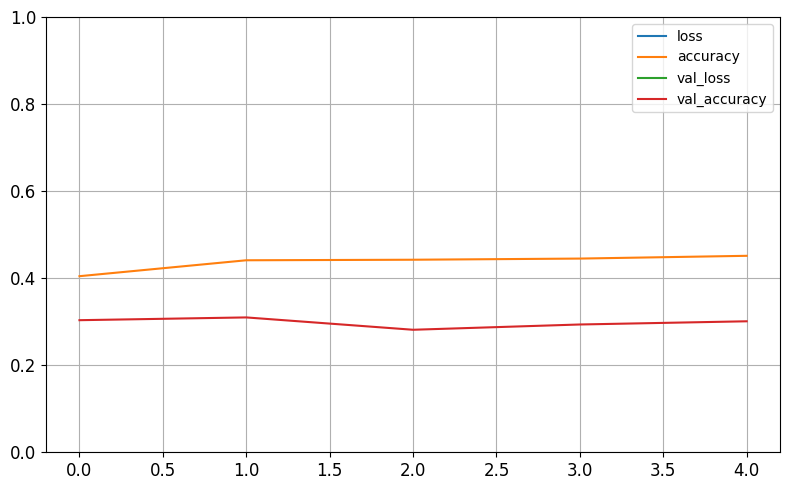

In [16]:
# Display the results of accuracy and loss from the validation set in graph plot
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("Thai_text_learning_curves_plot1")
plt.show()

## Generating Fake Text

In [17]:
log_probas = tf.math.log([[0.5, 0.4, 0.1]])  # probas = 50%, 40%, and 10%
tf.random.set_seed(42) # Generate random numbers and ensure reproducibility on CPU
tf.random.categorical(log_probas, num_samples=8)  # draw 8 samples

<tf.Tensor: shape=(1, 8), dtype=int64, numpy=array([[0, 1, 0, 2, 1, 0, 0, 1]], dtype=int64)>

In [18]:
my_script_model = tf.keras.Sequential([
    text_vec_layer,
    tf.keras.layers.Lambda(lambda X: X - 2),  # no <PAD> or <UNK> tokens
    model1
])

In [19]:
# A custom function to randomly generate next character 
def next_char(text, temperature=1):
    y_proba = my_script_model.predict([text])[0, -1:]
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples=1)[0, 0]
    return text_vec_layer.get_vocabulary()[char_id + 2]

In [20]:
# A custom function to randomly generate next 100 characters
def extend_text(text, n_chars, temperature=1):
    for _ in range(n_chars):
        text += next_char(text, temperature)
    return text

In [21]:
tf.random.set_seed(42) # Generate random numbers and ensure reproducibility on CPU

In [22]:
# Extend 10 characters with temperature at 100 for more random
n_chars10 = 10
print(extend_text("ทน", n_chars10, temperature=0.01))

1/1 [==============================] - 0s 50ms/step
ทน
เกษียร
เก


In [23]:
# Extend 50 characters with temperature at 1 for more random and less deterministic
n_chars25 = 25
print(extend_text("เจ้า", n_chars25, temperature=1)) 

1/1 [==============================] - 0s 47ms/step
เจ้า
วาดซื้
หัวหนู
มีเรือ
อยู


In [24]:
# Extend 100 characters with temperature at 0.01 for more deterministic
n_chars10 = 10
print(extend_text("กำ", n_chars10, temperature=100)) 

1/1 [==============================] - 0s 54ms/step
กำฝสษซำฌ32๋1


## Stateful RNN

In [25]:
def to_dataset_for_stateful_rnn(sequence, length, shuffle=True, seed=None, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices(sequence)
    ds = ds.window(length + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda window: window.batch(length + 1))
    if shuffle:
        ds = ds.shuffle(buffer_size=60_000, seed=seed)
    ds = ds.batch(batch_size, drop_remainder=True)
    return ds.map(lambda windows: (windows[:, :-1], windows[:, 1:])).prefetch(1)

stateful_train_set = to_dataset_for_stateful_rnn(encoded[:600_000], length)
stateful_valid_set = to_dataset_for_stateful_rnn(encoded[600_000:633_000], length)
stateful_test_set = to_dataset_for_stateful_rnn(encoded[633_000:], length)

In [26]:
# extra code – simple example using to_dataset_for_stateful_rnn()
list(to_dataset_for_stateful_rnn(tf.range(10), 4))

[]

In [27]:
# extra code – shows one way to prepare a batched dataset for a stateful RNN

import numpy as np

def to_non_overlapping_windows(sequence, length):
    ds = tf.data.Dataset.from_tensor_slices(sequence)
    ds = ds.window(length + 1, shift=length, drop_remainder=True)
    return ds.flat_map(lambda window: window.batch(length + 1))

def to_batched_dataset_for_stateful_rnn(sequence, length, batch_size=32):
    parts = np.array_split(sequence, batch_size)
    datasets = tuple(to_non_overlapping_windows(part, length) for part in parts)
    ds = tf.data.Dataset.zip(datasets).map(lambda *windows: tf.stack(windows))
    return ds.map(lambda window: (window[:, :-1], window[:, 1:])).prefetch(1)

dataset_list = list(to_batched_dataset_for_stateful_rnn(tf.range(20), length=4))


In [28]:
class ResetStatesCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

In [29]:
tf.random.set_seed(42) # Generate random numbers and ensure reproducibility on CPU

# Define the neural network model
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=n_tokens, output_dim=32),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Dense(n_tokens, activation="softmax")
])

# Compile the model with loss, optimizer, and metrics
model2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

# Create a ModelCheckpoint callback to save the best model during training
model_ckpt2 = tf.keras.callbacks.ModelCheckpoint(
    "my_script_model", monitor="val_accuracy", save_best_only=True)

# Train the model on the training and validation datasets for 10 epochs
history2 = model2.fit(stateful_train_set, validation_data=stateful_valid_set, epochs=10,
                    callbacks=[model_ckpt2, early_stopping], batch_size=32)

Epoch 1/10
  18746/Unknown - 1895s 101ms/step - loss: 2.0906 - accuracy: 0.4283INFO:tensorflow:Assets written to: my_script_model\assets


INFO:tensorflow:Assets written to: my_script_model\assets


18746/18746 [==============================] - 1939s 103ms/step - loss: 2.0906 - accuracy: 0.4283 - val_loss: 2.8271 - val_accuracy: 0.2585
Epoch 2/10
18746/18746 [==============================] - ETA: 0s - loss: 1.9294 - accuracy: 0.4645INFO:tensorflow:Assets written to: my_script_model\assets


INFO:tensorflow:Assets written to: my_script_model\assets


18746/18746 [==============================] - 2059s 109ms/step - loss: 1.9294 - accuracy: 0.4645 - val_loss: 2.7955 - val_accuracy: 0.2702
Epoch 3/10
18746/18746 [==============================] - ETA: 0s - loss: 1.8947 - accuracy: 0.4718INFO:tensorflow:Assets written to: my_script_model\assets


INFO:tensorflow:Assets written to: my_script_model\assets


18746/18746 [==============================] - 2120s 113ms/step - loss: 1.8947 - accuracy: 0.4718 - val_loss: 2.7995 - val_accuracy: 0.2778
Epoch 4/10
18746/18746 [==============================] - 2099s 112ms/step - loss: 1.8850 - accuracy: 0.4736 - val_loss: 2.7963 - val_accuracy: 0.2773
Epoch 5/10
18746/18746 [==============================] - ETA: 0s - loss: 1.8698 - accuracy: 0.4771INFO:tensorflow:Assets written to: my_script_model\assets


INFO:tensorflow:Assets written to: my_script_model\assets


18746/18746 [==============================] - 2126s 113ms/step - loss: 1.8698 - accuracy: 0.4771 - val_loss: 2.7574 - val_accuracy: 0.2898
Epoch 6/10
18746/18746 [==============================] - ETA: 0s - loss: 1.8630 - accuracy: 0.4785INFO:tensorflow:Assets written to: my_script_model\assets


INFO:tensorflow:Assets written to: my_script_model\assets


18746/18746 [==============================] - 2139s 114ms/step - loss: 1.8630 - accuracy: 0.4785 - val_loss: 2.7823 - val_accuracy: 0.2906
Epoch 7/10
18746/18746 [==============================] - 2167s 115ms/step - loss: 1.8601 - accuracy: 0.4787 - val_loss: 2.7812 - val_accuracy: 0.2887
Epoch 8/10
18746/18746 [==============================] - 2215s 118ms/step - loss: 1.8522 - accuracy: 0.4807 - val_loss: 2.7878 - val_accuracy: 0.2873
Epoch 8: early stopping


In [30]:
history2.params

{'verbose': 1, 'epochs': 10, 'steps': None}

Saving figure Thai_text_learning_curves_plot2


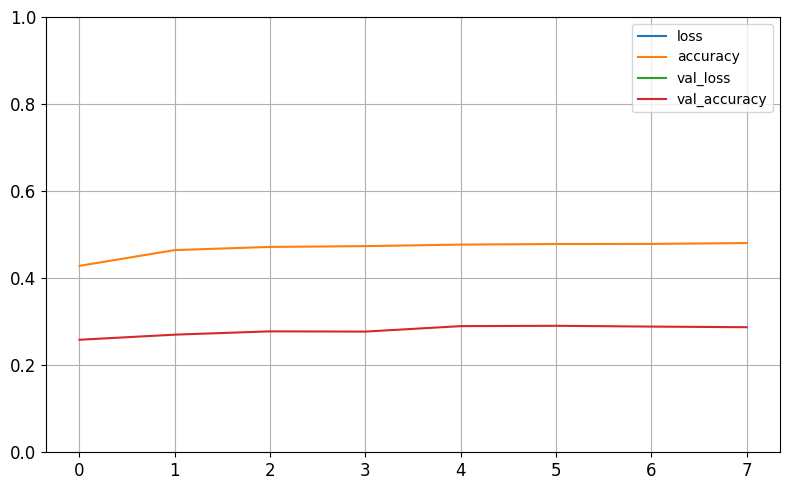

In [31]:
# Display the results of accuracy and loss from the validation set in graph plot
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("Thai_text_learning_curves_plot2")
plt.show()

In [32]:
# Tesing with new text "ทำอำไ" and extend 30 characters
n_chars = 10
print(extend_text("ทำอะไ", n_chars, temperature=0.01))

1/1 [==============================] - 0s 38ms/step
ทำอะไร
เกษียร
เ


## Building and Training the word-RNN Model¶

In [33]:
# A custom function to randomly generate the next word 
def next_word(text, temperature=1):
    word = ""
    while True:
        # Update the text with the current partial word
        current_text = text + word

        # Predict the next character
        y_proba = my_script_model.predict([current_text])[0, -1:]
        rescaled_logits = tf.math.log(y_proba) / temperature
        char_id = tf.random.categorical(rescaled_logits, num_samples=1)[0, 0]
        next_char = text_vec_layer.get_vocabulary()[char_id + 2]

        # Check if the next character signifies the end of a word
        if next_char in ['์', 'า', 'ะ', ' ']:  # Thai characters added as examples
            if next_char == ' ':  # Add the character if it's a space
                word += next_char
            break
        else:
            word += next_char

    return word


In [34]:
# A custom function to randomly generate next 100 characters
def extend_next_word(text, n_words, temperature=1):
    for _ in range(n_words):
        text += next_word(text, temperature)
    return text

In [38]:
# Tesing with new text "ทำอำไ" and extend 30 characters
n_words = 10
print(extend_next_word("กระแสไฟฟ้า", n_words, temperature=0.01))

1/1 [==============================] - 0s 82ms/step
กระแสไฟฟ้า
เกษกรณัฐ
เกษกรณีย


### Testing with pythainlp library

In [36]:
# Generate sentence from words
from pythainlp.generate import Unigram

gen = Unigram()
gen.gen_sentence("ออก")

'ออกไม่ดีกลับ'

## Summary

In summary, the model is engineered to understand and generate the Thai script, recognizing word boundaries and sentence structures inherent to the Thai language. However, even with the use of stateful techniques in Natural Language Processing (NLP), generating coherent Thai text remains a significant challenge due to the inherent complexity of the Thai language. The absence of clear symbols or charcaters to denote word endings in Thai adds to this complexity, making it difficult for NLP models to accurately segment and understand the text. As a result, the highest accuracy achieved in Thai text generation using these methods is approximately 40.5% with Nadam (Nesterov-accelerated Adaptive Moment Estimation). This relatively low accuracy rate is indicative of the challenges faced in processing Thai language texts. Furthermore, when comparing these stateful NLP techniques with functions from pythainlp, a library specifically designed for Thai language processing, it is found that neither method consistently generates coherent or meaningful sentences. This indicates the necessity for more sophisticated or customized approaches to effectively manage the distinct features of the Thai language in text generation.
 